## Выжившие на Титанике
<img src="Titanic.jpg">

Будем решать задачу по опередению выживших на борту Титаника. Задача учебная. Постараемся раскрыть как можно больше разных фишечек, которые могут пригодится в работе.

## Подключаем библиотеки

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import seaborn as sns

pd.options.display.max_rows = 100

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Все для моделей

In [42]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Загрузим данные и сделаем первичный анализ

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.sample(frac=1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C


In [5]:
test.sample(frac=1).head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,1035,2,"Beauchamp, Mr. Henry James",male,28.0,0,0,244358,26.0000,NaN,S
68,960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C
305,1197,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Ниже будет анализ и примеры разной красивой и полезной визуализации. А пока построим пару моделей

# RandomForest

In [79]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [80]:
train['Name_Title'] = train['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
train['Name_Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Mme.           1
the            1
Don.           1
Jonkheer.      1
Capt.          1
Lady.          1
Ms.            1
Sir.           1
Name: Name_Title, dtype: int64

In [81]:
train['Survived'].groupby(train['Name_Title']).mean()

Name_Title
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.156673
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

In [82]:
train['Name_Len'] = train['Name'].apply(lambda x: len(x))
train['Survived'].groupby(pd.qcut(train['Name_Len'],5)).mean()

Name_Len
(11.999, 19.0]    0.220588
(19.0, 23.0]      0.301282
(23.0, 27.0]      0.319797
(27.0, 32.0]      0.442424
(32.0, 82.0]      0.674556
Name: Survived, dtype: float64

In [83]:
pd.qcut(train['Name_Len'],5).value_counts()

(11.999, 19.0]    204
(23.0, 27.0]      197
(32.0, 82.0]      169
(27.0, 32.0]      165
(19.0, 23.0]      156
Name: Name_Len, dtype: int64

In [84]:
train['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [85]:
train['Survived'].groupby(train['Sex']).mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [86]:
train['Survived'].groupby(train['Age'].isnull()).mean()

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [87]:
train['Survived'].groupby(pd.qcut(train['Age'],5)).mean()

Age
(0.419, 19.0]    0.481707
(19.0, 25.0]     0.328467
(25.0, 31.8]     0.393701
(31.8, 41.0]     0.437500
(41.0, 80.0]     0.373239
Name: Survived, dtype: float64

In [88]:
pd.qcut(train['Age'],5).value_counts()

(0.419, 19.0]    164
(31.8, 41.0]     144
(41.0, 80.0]     142
(19.0, 25.0]     137
(25.0, 31.8]     127
Name: Age, dtype: int64

In [89]:
train['Survived'].groupby(train['SibSp']).mean()

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [90]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [91]:
train['Survived'].groupby(train['Parch']).mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [92]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [93]:
train['Ticket'].head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [94]:
train['Ticket_Len'] = train['Ticket'].apply(lambda x: len(x))

In [95]:
train['Ticket_Len'].value_counts()

6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13     10
12     10
15      9
11      8
18      6
3       2
Name: Ticket_Len, dtype: int64

In [96]:
train['Ticket_Lett'] = train['Ticket'].apply(lambda x: str(x)[0])

In [97]:
train['Ticket_Lett'].value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket_Lett, dtype: int64

In [98]:
train.groupby(['Ticket_Lett'])['Survived'].mean()

Ticket_Lett
1    0.630137
2    0.464481
3    0.239203
4    0.200000
5    0.000000
6    0.166667
7    0.111111
8    0.000000
9    1.000000
A    0.068966
C    0.340426
F    0.571429
L    0.250000
P    0.646154
S    0.323077
W    0.153846
Name: Survived, dtype: float64

In [99]:
pd.qcut(train['Fare'], 3).value_counts()

(-0.001, 8.662]    308
(26.0, 512.329]    295
(8.662, 26.0]      288
Name: Fare, dtype: int64

In [100]:
train['Survived'].groupby(pd.qcut(train['Fare'], 3)).mean()

Fare
(-0.001, 8.662]    0.198052
(8.662, 26.0]      0.402778
(26.0, 512.329]    0.559322
Name: Survived, dtype: float64

In [101]:
pd.crosstab(pd.qcut(train['Fare'], 5), columns=train['Pclass'])

Pclass,1,2,3
Fare,,,
"(-0.001, 7.854]",6,6,167
"(7.854, 10.5]",0,24,160
"(10.5, 21.679]",0,80,92
"(21.679, 39.688]",64,64,52
"(39.688, 512.329]",146,10,20


In [102]:
train['Cabin_Letter'] = train['Cabin'].apply(lambda x: str(x)[0])

In [103]:
train['Cabin_Letter'].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_Letter, dtype: int64

In [104]:
train['Survived'].groupby(train['Cabin_Letter']).mean()

Cabin_Letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64

In [105]:
train['Cabin_num'] = train['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
train['Cabin_num'].replace('an', np.NaN, inplace = True)
train['Cabin_num'] = train['Cabin_num'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)

In [106]:
pd.qcut(train['Cabin_num'],3).value_counts()

(65.667, 148.0]     67
(1.999, 28.667]     67
(28.667, 65.667]    66
Name: Cabin_num, dtype: int64

In [107]:
train['Survived'].groupby(pd.qcut(train['Cabin_num'], 3)).mean()

Cabin_num
(1.999, 28.667]     0.716418
(28.667, 65.667]    0.651515
(65.667, 148.0]     0.641791
Name: Survived, dtype: float64

In [108]:
train['Survived'].corr(train['Cabin_num'])

-0.063845959227893712

In [109]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [110]:
train['Embarked'].value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [111]:
train['Survived'].groupby(train['Embarked']).mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

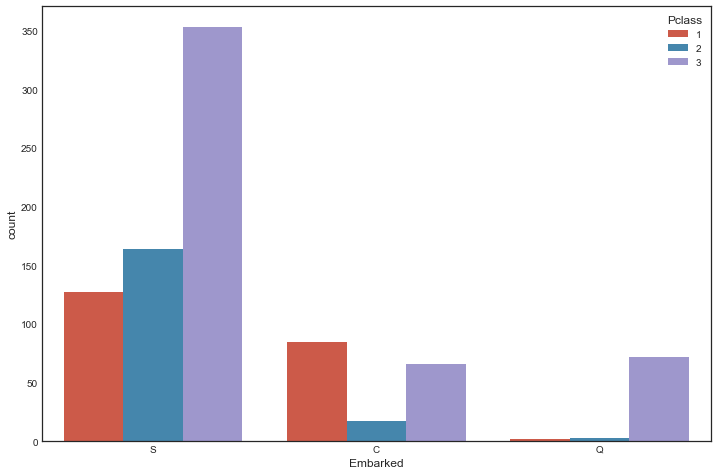

In [112]:
sns.countplot(train['Embarked'], hue=train['Pclass'])

In [113]:
def names(train, test):
    for i in [train, test]:
        i['Name_Len'] = i['Name'].apply(lambda x: len(x))
        i['Name_Title'] = i['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])
        del i['Name']
    return train, test

In [114]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

In [115]:
def fam_size(train, test):
    for i in [train, test]:
        i['Fam_Size'] = np.where((i['SibSp']+i['Parch']) == 0 , 'Solo',
                           np.where((i['SibSp']+i['Parch']) <= 3,'Nuclear', 'Big'))
        del i['SibSp']
        del i['Parch']
    return train, test

In [116]:
def ticket_grouped(train, test):
    for i in [train, test]:
        i['Ticket_Lett'] = i['Ticket'].apply(lambda x: str(x)[0])
        i['Ticket_Lett'] = i['Ticket_Lett'].apply(lambda x: str(x))
        i['Ticket_Lett'] = np.where((i['Ticket_Lett']).isin(['1', '2', '3', 'S', 'P', 'C', 'A']), i['Ticket_Lett'],
                                   np.where((i['Ticket_Lett']).isin(['W', '4', '7', '6', 'L', '5', '8']),
                                            'Low_ticket', 'Other_ticket'))
        i['Ticket_Len'] = i['Ticket'].apply(lambda x: len(x))
        del i['Ticket']
    return train, test

In [117]:
def cabin(train, test):
    for i in [train, test]:
        i['Cabin_Letter'] = i['Cabin'].apply(lambda x: str(x)[0])
        del i['Cabin']
    return train, test

In [118]:
def cabin_num(train, test):
    for i in [train, test]:
        i['Cabin_num1'] = i['Cabin'].apply(lambda x: str(x).split(' ')[-1][1:])
        i['Cabin_num1'].replace('an', np.NaN, inplace = True)
        i['Cabin_num1'] = i['Cabin_num1'].apply(lambda x: int(x) if not pd.isnull(x) and x != '' else np.NaN)
        i['Cabin_num'] = pd.qcut(train['Cabin_num1'],3)
    train = pd.concat((train, pd.get_dummies(train['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    test = pd.concat((test, pd.get_dummies(test['Cabin_num'], prefix = 'Cabin_num')), axis = 1)
    del train['Cabin_num']
    del test['Cabin_num']
    del train['Cabin_num1']
    del test['Cabin_num1']
    return train, test

In [119]:
def embarked_impute(train, test):
    for i in [train, test]:
        i['Embarked'] = i['Embarked'].fillna('S')
    return train, test

In [120]:
test['Fare'].fillna(train['Fare'].mean(), inplace = True)

In [121]:
def dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett', 'Cabin_Letter', 'Name_Title', 'Fam_Size']):
    for column in columns:
        train[column] = train[column].apply(lambda x: str(x))
        test[column] = test[column].apply(lambda x: str(x))
        good_cols = [column+'_'+i for i in train[column].unique() if i in test[column].unique()]
        train = pd.concat((train, pd.get_dummies(train[column], prefix = column)[good_cols]), axis = 1)
        test = pd.concat((test, pd.get_dummies(test[column], prefix = column)[good_cols]), axis = 1)
        del train[column]
        del test[column]
    return train, test

In [122]:
def drop(train, test, bye = ['PassengerId']):
    for i in [train, test]:
        for z in bye:
            del i[z]
    return train, test

In [123]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train, test = names(train, test)
train, test = age_impute(train, test)
train, test = cabin_num(train, test)
train, test = cabin(train, test)
train, test = embarked_impute(train, test)
train, test = fam_size(train, test)
test['Fare'].fillna(train['Fare'].mean(), inplace = True)
train, test = ticket_grouped(train, test)
train, test = dummies(train, test, columns = ['Pclass', 'Sex', 'Embarked', 'Ticket_Lett',
                                                                     'Cabin_Letter', 'Name_Title', 'Fam_Size'])
train, test = drop(train, test)

In [124]:
print(len(train.columns))

45


In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(train.iloc[:, 1:], train.iloc[:, 0])

print(gs.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 700}


In [126]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)

0.8294


In [127]:
pd.concat((pd.DataFrame(train.iloc[:, 1:].columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

,variable,importance
12,Sex_female,0.111215
11,Sex_male,0.109769
33,Name_Title_Mr.,0.109746
1,Fare,0.088209
2,Name_Len,0.087904
0,Age,0.078651
8,Pclass_3,0.043268
35,Name_Title_Miss.,0.031292
7,Ticket_Len,0.031079
34,Name_Title_Mrs.,0.028852


In [128]:
predictions = rf.predict(test)
predictions = pd.DataFrame(predictions, columns=['Survived'])
test = pd.read_csv('test.csv')
predictions = pd.concat((test.iloc[:, 0], predictions), axis = 1)
predictions.to_csv('rf_submit.csv', sep=",", index = False)

Результат - 0.82296

## lightGBM

In [179]:
data = pd.read_csv('train.csv')

In [180]:
data['Age'].fillna(data['Age'].median(), inplace=True)

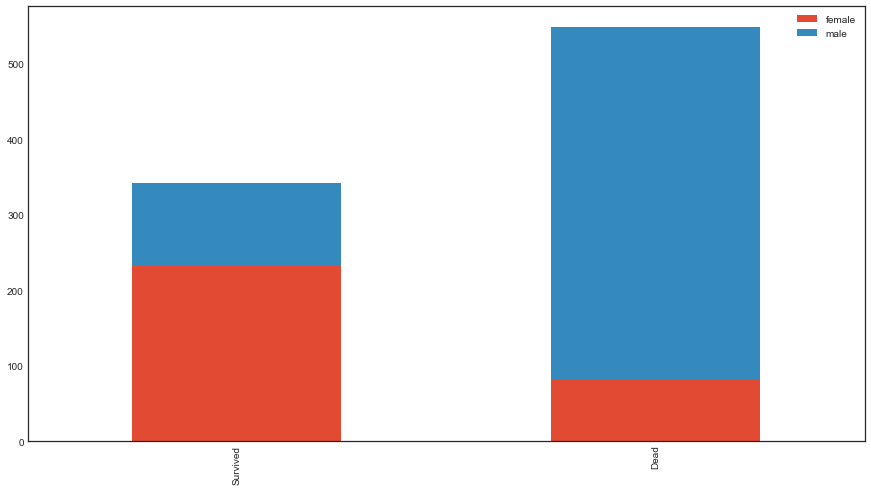

In [181]:
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [182]:
train = pd.read_csv('train.csv')
    
# reading test data
test = pd.read_csv('test.csv')

# extracting and then removing the targets from the training data 
targets = train.Survived
train.drop('Survived', 1, inplace=True)
    

# merging train data and test data for future feature engineering
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop('index', inplace=True, axis=1)

In [183]:
combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
# a map of more aggregated titles
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                   }
    
# we map each title
combined['Title'] = combined.Title.map(Title_Dictionary)

In [184]:
grouped_train = combined.head(891).groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()

grouped_test = combined.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()

In [185]:
def process_age():
    
    global combined
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    combined.head(891).Age = combined.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    combined.iloc[891:].Age = combined.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)

In [186]:
process_age()

In [187]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Title          1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [188]:
# we clean the Name variable
combined.drop('Name',axis=1,inplace=True)
    
# encoding in dummy variable
titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
combined = pd.concat([combined,titles_dummies],axis=1)
   
# removing the title variable
combined.drop('Title',axis=1,inplace=True)

In [189]:
combined.head(891).Fare.fillna(combined.head(891).Fare.mean(), inplace=True)
combined.iloc[891:].Fare.fillna(combined.iloc[891:].Fare.mean(), inplace=True)    

In [190]:
# two missing embarked values - filling them with the most frequent one (S)
combined.head(891).Embarked.fillna('S', inplace=True)
combined.iloc[891:].Embarked.fillna('S', inplace=True)
    
# dummy encoding 
embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
combined = pd.concat([combined,embarked_dummies],axis=1)
combined.drop('Embarked',axis=1,inplace=True)

In [191]:
# replacing missing cabins with U (for Uknown)
combined.Cabin.fillna('U', inplace=True)
    
# mapping each Cabin value with the cabin letter
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])
    
# dummy encoding ...
cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    
combined = pd.concat([combined,cabin_dummies], axis=1)
    
combined.drop('Cabin', axis=1, inplace=True)

In [192]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 26 columns):
PassengerId      1309 non-null int64
Pclass           1309 non-null int64
Sex              1309 non-null object
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Ticket           1309 non-null object
Fare             1309 non-null float64
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Cabin_A          1309 non-null uint8
Cabin_B          1309 non-null uint8
Cabin_C          1309 non-null uint8
Cabin_D          1309 non-null uint8
Cabin_E          1309 non-null uint8
Cabin_F          1309 non-null uint8
Cabin_G          1309 non-null uint8

In [193]:
combined.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [194]:
combined['Sex'] = combined['Sex'].map({'male':1,'female':0})

In [195]:
pclass_dummies = pd.get_dummies(combined['Pclass'], prefix="Pclass")
    
# adding dummy variables
combined = pd.concat([combined,pclass_dummies],axis=1)
    
# removing "Pclass"
combined.drop('Pclass',axis=1,inplace=True)

In [196]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()    
    ticket = map(lambda t : t.strip(), ticket)
   # ticket = filter(lambda t : not t.isdigit(), ticket)

    ticket = [x for x in ticket if not x.isdigit()]
    # print(type(ticket))
    if len(ticket) > 0:
       return ticket[0]
    else: 
       return 'XXX'
    

# Extracting dummy variables from tickets:

combined['Ticket'] = combined['Ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(combined['Ticket'], prefix='Ticket')
combined = pd.concat([combined, tickets_dummies], axis=1)
combined.drop('Ticket', inplace=True, axis=1)

In [197]:
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
    
# introducing other features based on the family size
combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s == 1 else 0)
combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<=s<=4 else 0)
combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<=s else 0)

In [198]:
combined.shape

(1309, 68)

In [199]:
combined.drop('PassengerId', inplace=True, axis=1)

In [200]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

In [201]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [202]:
def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.Survived
    train = combined.head(891)
    test = combined.iloc[891:]
    
    return train, test, targets

In [203]:
train, test, targets = recover_train_test_target()

In [206]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [207]:
from sklearn.cross_validation import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(train, targets, test_size=0.2, random_state=20)

In [209]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

param_grid = {
    'n_estimators': [x for x in range(50, 1050,50)],
    'learning_rate': [ 0.01, 0.005,0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.687907
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.682797
[3]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677718
[4]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.672822
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.667938
[6]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.663247
Early stopping, best iteration is:
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.687907
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.687938
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.868737	valid_0's binary_logloss: 0.682899
[3]	valid_0's auc: 0.865272	valid_0's binary_logloss: 0.677964
[4]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.67299
[5]	valid_0's auc: 0.865405	valid_0's binary_logloss: 0.668252
[6]	valid_0's auc: 0.866871	valid_0's binary_logloss: 0.663474
[7]	valid_0's auc: 0.866604	

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.688222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.83049	valid_0's binary_logloss: 0.683393
[3]	valid_0's auc: 0.830357	valid_0's binary_logloss: 0.678699
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[5]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.669539
[6]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.665128
[7]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.660781
[8]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.656546
[9]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.652372
Early stopping, best iteration is:
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.687907
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.682797
[3]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677718
[4]	valid_0's auc: 0.84208

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.688222
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.83049	valid_0's binary_logloss: 0.683393
[3]	valid_0's auc: 0.830357	valid_0's binary_logloss: 0.678699
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[5]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.669539
[6]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.665128
[7]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.660781
[8]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.656546
[9]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.652372
Early stopping, best iteration is:
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.687907
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.682797
[3]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677718
[4]	valid_0's auc: 0.84208

[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[5]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.669539
[6]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.665128
[7]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.660781
[8]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.656546
[9]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.652372
Early stopping, best iteration is:
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.687907
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.682797
[3]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677718
[4]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.672822
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.667938
[6]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.663247
Early stopping, best iteration is:
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss

[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[5]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.669539
[6]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.665128
[7]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.660781
[8]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.656546
[9]	valid_0's auc: 0.831823	valid_0's binary_logloss: 0.652372
Early stopping, best iteration is:
[4]	valid_0's auc: 0.832223	valid_0's binary_logloss: 0.674076
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.690519
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.687929
[3]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.685368
[4]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.682833
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.680278
[6]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677797
Early stopping, best iteration is:
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.690678
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.832356	valid_0's binary_logloss: 0.688231
[3]	valid_0's auc: 0.830357	valid_0's binary_logloss: 0.685828
[4]	valid_0's auc: 0.830357	valid_0's binary_logloss: 0.683431
[5]	valid_0's auc: 0.829957	valid_0's binary_logloss: 0.681078
[6]	valid_0's auc: 0.829957	valid_0's binary_logloss: 0.678731
[7]	valid_0's auc: 0.829957	valid_0's binary_logloss: 0.676413
Early stopping, best iteration is:
[2]	valid_0's auc: 0.832356	valid_0's binary_logloss: 0.688231
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.690519
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.687929
[3]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.685368
[4]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.682833
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.680278
[6]	valid_0's auc: 0.8420

[3]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.685368
[4]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.682833
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.680278
[6]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677797
Early stopping, best iteration is:
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.690519
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.690535
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.868737	valid_0's binary_logloss: 0.687983
[3]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.685377
[4]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.682886
[5]	valid_0's auc: 0.865405	valid_0's binary_logloss: 0.680411
[6]	valid_0's auc: 0.866871	valid_0's binary_logloss: 0.677893
[7]	valid_0's auc: 0.866604	valid_0's binary_logloss: 0.675468
Early stopping, best iteration is:
[2]	valid_0's auc: 0.868737	valid_0's binary_logloss: 0.687983
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.690519
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.687929
[3]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.685368
[4]	valid_0's auc: 0.842284	valid_0's binary_logloss: 0.682833
[5]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.680278
[6]	valid_0's auc: 0.842084	valid_0's binary_logloss: 0.677797
Early stopping, best iteration is:
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.690519
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.690535
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.868737	valid_0's binary_logloss: 0.687983
[3]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.685377
[4]	valid_0's auc: 0.866471	valid_0's binary_logloss: 0.682886
[5]	valid_0's auc: 0.865405	valid_0's binary_logloss: 0.680411
[6]	valid_0's auc: 0.866871	valid_0's binary_logloss: 0.677893
[7]	valid_0's auc: 0.866604

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.643514
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.603035
[3]	valid_0's auc: 0.854144	valid_0's binary_logloss: 0.569763
[4]	valid_0's auc: 0.853345	valid_0's binary_logloss: 0.543454
[5]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.521566
[6]	valid_0's auc: 0.853745	valid_0's binary_logloss: 0.500625
[7]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.485848
[8]	valid_0's auc: 0.854744	valid_0's binary_logloss: 0.471016
[9]	valid_0's auc: 0.854078	valid_0's binary_logloss: 0.460992
[10]	valid_0's auc: 0.857343	valid_0's binary_logloss: 0.450817
[11]	valid_0's auc: 0.857276	valid_0's binary_logloss: 0.44495
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[13]	valid_0's auc: 0.856477	valid_0's binary_logloss: 0.431014
[14]	valid_0's auc: 0.854411	valid_0's binary_logloss: 0.42708
[15]	valid_0's auc: 0.853945	valid_0's binary_logloss: 

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.643767
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.861341	valid_0's binary_logloss: 0.604769
[3]	valid_0's auc: 0.864805	valid_0's binary_logloss: 0.573374
[4]	valid_0's auc: 0.859408	valid_0's binary_logloss: 0.548103
[5]	valid_0's auc: 0.863006	valid_0's binary_logloss: 0.525667
[6]	valid_0's auc: 0.865938	valid_0's binary_logloss: 0.505912
[7]	valid_0's auc: 0.867804	valid_0's binary_logloss: 0.488607
[8]	valid_0's auc: 0.869136	valid_0's binary_logloss: 0.474464
[9]	valid_0's auc: 0.868603	valid_0's binary_logloss: 0.462688
[10]	valid_0's auc: 0.870003	valid_0's binary_logloss: 0.452859
[11]	valid_0's auc: 0.869336	valid_0's binary_logloss: 0.444471
[12]	valid_0's auc: 0.86947	valid_0's binary_logloss: 0.437028
[13]	valid_0's auc: 0.866671	valid_0's binary_logloss: 0.431975
[14]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.429168
[15]	valid_0's auc: 0.862607	valid_0's binary_logloss:

[3]	valid_0's auc: 0.854144	valid_0's binary_logloss: 0.569763
[4]	valid_0's auc: 0.853345	valid_0's binary_logloss: 0.543454
[5]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.521566
[6]	valid_0's auc: 0.853745	valid_0's binary_logloss: 0.500625
[7]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.485848
[8]	valid_0's auc: 0.854744	valid_0's binary_logloss: 0.471016
[9]	valid_0's auc: 0.854078	valid_0's binary_logloss: 0.460992
[10]	valid_0's auc: 0.857343	valid_0's binary_logloss: 0.450817
[11]	valid_0's auc: 0.857276	valid_0's binary_logloss: 0.44495
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[13]	valid_0's auc: 0.856477	valid_0's binary_logloss: 0.431014
[14]	valid_0's auc: 0.854411	valid_0's binary_logloss: 0.42708
[15]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.420761
[16]	valid_0's auc: 0.856343	valid_0's binary_logloss: 0.417554
[17]	valid_0's auc: 0.858209	valid_0's binary_logloss: 0.412405
Early stopping, best iteration is:
[12]	valid_0's

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.646363
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.607468
[3]	valid_0's auc: 0.843084	valid_0's binary_logloss: 0.576103
[4]	valid_0's auc: 0.839952	valid_0's binary_logloss: 0.550464
[5]	valid_0's auc: 0.848814	valid_0's binary_logloss: 0.528007
[6]	valid_0's auc: 0.84415	valid_0's binary_logloss: 0.51122
[7]	valid_0's auc: 0.848414	valid_0's binary_logloss: 0.495123
[8]	valid_0's auc: 0.845349	valid_0's binary_logloss: 0.484114
[9]	valid_0's auc: 0.844017	valid_0's binary_logloss: 0.474039
[10]	valid_0's auc: 0.837353	valid_0's binary_logloss: 0.467093
Early stopping, best iteration is:
[5]	valid_0's auc: 0.848814	valid_0's binary_logloss: 0.528007
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.643514
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.603035
[3]	valid_0's auc: 0.85414

Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.861341	valid_0's binary_logloss: 0.604769
[3]	valid_0's auc: 0.864805	valid_0's binary_logloss: 0.573374
[4]	valid_0's auc: 0.859408	valid_0's binary_logloss: 0.548103
[5]	valid_0's auc: 0.863006	valid_0's binary_logloss: 0.525667
[6]	valid_0's auc: 0.865938	valid_0's binary_logloss: 0.505912
[7]	valid_0's auc: 0.867804	valid_0's binary_logloss: 0.488607
[8]	valid_0's auc: 0.869136	valid_0's binary_logloss: 0.474464
[9]	valid_0's auc: 0.868603	valid_0's binary_logloss: 0.462688
[10]	valid_0's auc: 0.870003	valid_0's binary_logloss: 0.452859
[11]	valid_0's auc: 0.869336	valid_0's binary_logloss: 0.444471
[12]	valid_0's auc: 0.86947	valid_0's binary_logloss: 0.437028
[13]	valid_0's auc: 0.866671	valid_0's binary_logloss: 0.431975
[14]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.429168
[15]	valid_0's auc: 0.862607	valid_0's binary_logloss: 0.423837
Early stopping, best iteration is:
[10]	valid_0's au

[11]	valid_0's auc: 0.857276	valid_0's binary_logloss: 0.44495
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[13]	valid_0's auc: 0.856477	valid_0's binary_logloss: 0.431014
[14]	valid_0's auc: 0.854411	valid_0's binary_logloss: 0.42708
[15]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.420761
[16]	valid_0's auc: 0.856343	valid_0's binary_logloss: 0.417554
[17]	valid_0's auc: 0.858209	valid_0's binary_logloss: 0.412405
Early stopping, best iteration is:
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.643767
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.861341	valid_0's binary_logloss: 0.604769
[3]	valid_0's auc: 0.864805	valid_0's binary_logloss: 0.573374
[4]	valid_0's auc: 0.859408	valid_0's binary_logloss: 0.548103
[5]	valid_0's auc: 0.863006	valid_0's binary_logloss: 0.525667
[6]	valid_0's auc: 0.865938	valid_0's binary_logloss: 0.505912
[7]	valid_0's auc

[5]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.521566
[6]	valid_0's auc: 0.853745	valid_0's binary_logloss: 0.500625
[7]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.485848
[8]	valid_0's auc: 0.854744	valid_0's binary_logloss: 0.471016
[9]	valid_0's auc: 0.854078	valid_0's binary_logloss: 0.460992
[10]	valid_0's auc: 0.857343	valid_0's binary_logloss: 0.450817
[11]	valid_0's auc: 0.857276	valid_0's binary_logloss: 0.44495
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[13]	valid_0's auc: 0.856477	valid_0's binary_logloss: 0.431014
[14]	valid_0's auc: 0.854411	valid_0's binary_logloss: 0.42708
[15]	valid_0's auc: 0.853945	valid_0's binary_logloss: 0.420761
[16]	valid_0's auc: 0.856343	valid_0's binary_logloss: 0.417554
[17]	valid_0's auc: 0.858209	valid_0's binary_logloss: 0.412405
Early stopping, best iteration is:
[12]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.435696
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.643767
Training until

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.63552
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.590082
[3]	valid_0's auc: 0.841218	valid_0's binary_logloss: 0.555317
[4]	valid_0's auc: 0.847481	valid_0's binary_logloss: 0.526251
[5]	valid_0's auc: 0.844683	valid_0's binary_logloss: 0.505814
[6]	valid_0's auc: 0.841884	valid_0's binary_logloss: 0.490254
[7]	valid_0's auc: 0.842617	valid_0's binary_logloss: 0.47612
[8]	valid_0's auc: 0.839686	valid_0's binary_logloss: 0.466421
[9]	valid_0's auc: 0.841018	valid_0's binary_logloss: 0.459692
Early stopping, best iteration is:
[4]	valid_0's auc: 0.847481	valid_0's binary_logloss: 0.526251
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.632064
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.584869
[3]	valid_0's auc: 0.851146	valid_0's binary_logloss: 0.548656
[4]	valid_0's auc: 0.85661	

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.632361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.588093
[3]	valid_0's auc: 0.855677	valid_0's binary_logloss: 0.554684
[4]	valid_0's auc: 0.859741	valid_0's binary_logloss: 0.525234
[5]	valid_0's auc: 0.863473	valid_0's binary_logloss: 0.500404
[6]	valid_0's auc: 0.865605	valid_0's binary_logloss: 0.481095
[7]	valid_0's auc: 0.866271	valid_0's binary_logloss: 0.46574
[8]	valid_0's auc: 0.870869	valid_0's binary_logloss: 0.454585
[9]	valid_0's auc: 0.867138	valid_0's binary_logloss: 0.4434
[10]	valid_0's auc: 0.866671	valid_0's binary_logloss: 0.435041
[11]	valid_0's auc: 0.865005	valid_0's binary_logloss: 0.429949
[12]	valid_0's auc: 0.863939	valid_0's binary_logloss: 0.422884
[13]	valid_0's auc: 0.861074	valid_0's binary_logloss: 0.420056
Early stopping, best iteration is:
[8]	valid_0's auc: 0.870869	valid_0's binary_logloss: 0.454585
[1]	valid_0's auc: 0.8

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.632064
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.584869
[3]	valid_0's auc: 0.851146	valid_0's binary_logloss: 0.548656
[4]	valid_0's auc: 0.85661	valid_0's binary_logloss: 0.519242
[5]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.497886
[6]	valid_0's auc: 0.854678	valid_0's binary_logloss: 0.477772
[7]	valid_0's auc: 0.848614	valid_0's binary_logloss: 0.464307
[8]	valid_0's auc: 0.848348	valid_0's binary_logloss: 0.453732
[9]	valid_0's auc: 0.854211	valid_0's binary_logloss: 0.442504
Early stopping, best iteration is:
[4]	valid_0's auc: 0.85661	valid_0's binary_logloss: 0.519242
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.632361
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.588093
[3]	valid_0's auc: 0.855677	valid_0's binary_logloss: 0.554684
[4]	valid_0's auc: 0.859741	

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.63552
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.590082
[3]	valid_0's auc: 0.841218	valid_0's binary_logloss: 0.555317
[4]	valid_0's auc: 0.847481	valid_0's binary_logloss: 0.526251
[5]	valid_0's auc: 0.844683	valid_0's binary_logloss: 0.505814
[6]	valid_0's auc: 0.841884	valid_0's binary_logloss: 0.490254
[7]	valid_0's auc: 0.842617	valid_0's binary_logloss: 0.47612
[8]	valid_0's auc: 0.839686	valid_0's binary_logloss: 0.466421
[9]	valid_0's auc: 0.841018	valid_0's binary_logloss: 0.459692
Early stopping, best iteration is:
[4]	valid_0's auc: 0.847481	valid_0's binary_logloss: 0.526251
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.632064
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.841418	valid_0's binary_logloss: 0.584869
[3]	valid_0's auc: 0.851146	valid_0's binary_logloss: 0.548656
[4]	valid_0's auc: 0.85661	

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.620995
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.843284	valid_0's binary_logloss: 0.567816
[3]	valid_0's auc: 0.847082	valid_0's binary_logloss: 0.53028
[4]	valid_0's auc: 0.848747	valid_0's binary_logloss: 0.498182
[5]	valid_0's auc: 0.852212	valid_0's binary_logloss: 0.477782
[6]	valid_0's auc: 0.853611	valid_0's binary_logloss: 0.459442
[7]	valid_0's auc: 0.851146	valid_0's binary_logloss: 0.447986
[8]	valid_0's auc: 0.850013	valid_0's binary_logloss: 0.439298
[9]	valid_0's auc: 0.849214	valid_0's binary_logloss: 0.431578
[10]	valid_0's auc: 0.848614	valid_0's binary_logloss: 0.42868
[11]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.424868
Early stopping, best iteration is:
[6]	valid_0's auc: 0.853611	valid_0's binary_logloss: 0.459442
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.621328
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.85827

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.620995
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.843284	valid_0's binary_logloss: 0.567816
[3]	valid_0's auc: 0.847082	valid_0's binary_logloss: 0.53028
[4]	valid_0's auc: 0.848747	valid_0's binary_logloss: 0.498182
[5]	valid_0's auc: 0.852212	valid_0's binary_logloss: 0.477782
[6]	valid_0's auc: 0.853611	valid_0's binary_logloss: 0.459442
[7]	valid_0's auc: 0.851146	valid_0's binary_logloss: 0.447986
[8]	valid_0's auc: 0.850013	valid_0's binary_logloss: 0.439298
[9]	valid_0's auc: 0.849214	valid_0's binary_logloss: 0.431578
[10]	valid_0's auc: 0.848614	valid_0's binary_logloss: 0.42868
[11]	valid_0's auc: 0.850746	valid_0's binary_logloss: 0.424868
Early stopping, best iteration is:
[6]	valid_0's auc: 0.853611	valid_0's binary_logloss: 0.459442
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.621328
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.85827

[11]	valid_0's auc: 0.867337	valid_0's binary_logloss: 0.415848
[12]	valid_0's auc: 0.864339	valid_0's binary_logloss: 0.413007
[13]	valid_0's auc: 0.864206	valid_0's binary_logloss: 0.40982
Early stopping, best iteration is:
[8]	valid_0's auc: 0.871335	valid_0's binary_logloss: 0.437002
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.625016
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.574097
[3]	valid_0's auc: 0.837154	valid_0's binary_logloss: 0.537302
[4]	valid_0's auc: 0.84455	valid_0's binary_logloss: 0.507159
[5]	valid_0's auc: 0.843483	valid_0's binary_logloss: 0.486337
[6]	valid_0's auc: 0.843883	valid_0's binary_logloss: 0.472193
[7]	valid_0's auc: 0.841884	valid_0's binary_logloss: 0.461859
Early stopping, best iteration is:
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.574097
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.620995
Training until validation scores don't improve for

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.621328
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.571802
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.534159
[4]	valid_0's auc: 0.862007	valid_0's binary_logloss: 0.503724
[5]	valid_0's auc: 0.865205	valid_0's binary_logloss: 0.479275
[6]	valid_0's auc: 0.865738	valid_0's binary_logloss: 0.461158
[7]	valid_0's auc: 0.868204	valid_0's binary_logloss: 0.448855
[8]	valid_0's auc: 0.871335	valid_0's binary_logloss: 0.437002
[9]	valid_0's auc: 0.868803	valid_0's binary_logloss: 0.4277
[10]	valid_0's auc: 0.870669	valid_0's binary_logloss: 0.419728
[11]	valid_0's auc: 0.867337	valid_0's binary_logloss: 0.415848
[12]	valid_0's auc: 0.864339	valid_0's binary_logloss: 0.413007
[13]	valid_0's auc: 0.864206	valid_0's binary_logloss: 0.40982
Early stopping, best iteration is:
[8]	valid_0's auc: 0.871335	valid_0's binary_logloss: 0.437002
[1]	valid_0's auc: 0.82

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.621328
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.571802
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.534159
[4]	valid_0's auc: 0.862007	valid_0's binary_logloss: 0.503724
[5]	valid_0's auc: 0.865205	valid_0's binary_logloss: 0.479275
[6]	valid_0's auc: 0.865738	valid_0's binary_logloss: 0.461158
[7]	valid_0's auc: 0.868204	valid_0's binary_logloss: 0.448855
[8]	valid_0's auc: 0.871335	valid_0's binary_logloss: 0.437002
[9]	valid_0's auc: 0.868803	valid_0's binary_logloss: 0.4277
[10]	valid_0's auc: 0.870669	valid_0's binary_logloss: 0.419728
[11]	valid_0's auc: 0.867337	valid_0's binary_logloss: 0.415848
[12]	valid_0's auc: 0.864339	valid_0's binary_logloss: 0.413007
[13]	valid_0's auc: 0.864206	valid_0's binary_logloss: 0.40982
Early stopping, best iteration is:
[8]	valid_0's auc: 0.871335	valid_0's binary_logloss: 0.437002
[1]	valid_0's auc: 0.82

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.610666
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.556842
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.517724
[4]	valid_0's auc: 0.864072	valid_0's binary_logloss: 0.487428
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[6]	valid_0's auc: 0.867671	valid_0's binary_logloss: 0.446506
[7]	valid_0's auc: 0.869203	valid_0's binary_logloss: 0.433952
[8]	valid_0's auc: 0.862807	valid_0's binary_logloss: 0.426927
[9]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.418129
[10]	valid_0's auc: 0.861007	valid_0's binary_logloss: 0.41452
Early stopping, best iteration is:
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.614849
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.845016	valid_0's binary_logloss: 0.559417
[3]	valid_0's auc: 0.837553

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.610666
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.556842
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.517724
[4]	valid_0's auc: 0.864072	valid_0's binary_logloss: 0.487428
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[6]	valid_0's auc: 0.867671	valid_0's binary_logloss: 0.446506
[7]	valid_0's auc: 0.869203	valid_0's binary_logloss: 0.433952
[8]	valid_0's auc: 0.862807	valid_0's binary_logloss: 0.426927
[9]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.418129
[10]	valid_0's auc: 0.861007	valid_0's binary_logloss: 0.41452
Early stopping, best iteration is:
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.614849
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.845016	valid_0's binary_logloss: 0.559417
[3]	valid_0's auc: 0.837553

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.610666
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.556842
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.517724
[4]	valid_0's auc: 0.864072	valid_0's binary_logloss: 0.487428
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[6]	valid_0's auc: 0.867671	valid_0's binary_logloss: 0.446506
[7]	valid_0's auc: 0.869203	valid_0's binary_logloss: 0.433952
[8]	valid_0's auc: 0.862807	valid_0's binary_logloss: 0.426927
[9]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.418129
[10]	valid_0's auc: 0.861007	valid_0's binary_logloss: 0.41452
Early stopping, best iteration is:
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.614849
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.845016	valid_0's binary_logloss: 0.559417
[3]	valid_0's auc: 0.837553

[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.610666
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.556842
[3]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.517724
[4]	valid_0's auc: 0.864072	valid_0's binary_logloss: 0.487428
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[6]	valid_0's auc: 0.867671	valid_0's binary_logloss: 0.446506
[7]	valid_0's auc: 0.869203	valid_0's binary_logloss: 0.433952
[8]	valid_0's auc: 0.862807	valid_0's binary_logloss: 0.426927
[9]	valid_0's auc: 0.86214	valid_0's binary_logloss: 0.418129
[10]	valid_0's auc: 0.861007	valid_0's binary_logloss: 0.41452
Early stopping, best iteration is:
[5]	valid_0's auc: 0.872535	valid_0's binary_logloss: 0.464175
[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.614849
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.845016	valid_0's binary_logloss: 0.559417
[3]	valid_0's auc: 0.837553

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.614849
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.845016	valid_0's binary_logloss: 0.559417
[3]	valid_0's auc: 0.837553	valid_0's binary_logloss: 0.521185
[4]	valid_0's auc: 0.847148	valid_0's binary_logloss: 0.491443
[5]	valid_0's auc: 0.840885	valid_0's binary_logloss: 0.473369
[6]	valid_0's auc: 0.840019	valid_0's binary_logloss: 0.460397
[7]	valid_0's auc: 0.841351	valid_0's binary_logloss: 0.449748
[8]	valid_0's auc: 0.84315	valid_0's binary_logloss: 0.443724
[9]	valid_0's auc: 0.846149	valid_0's binary_logloss: 0.440077
Early stopping, best iteration is:
[4]	valid_0's auc: 0.847148	valid_0's binary_logloss: 0.491443
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.610304
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.552717
[3]	valid_0's auc: 0.855943	valid_0's binary_logloss: 0.51395
[4]	valid_0's auc: 0.858809

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.599989
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[3]	valid_0's auc: 0.851479	valid_0's binary_logloss: 0.499489
[4]	valid_0's auc: 0.84455	valid_0's binary_logloss: 0.473745
[5]	valid_0's auc: 0.850813	valid_0's binary_logloss: 0.450229
[6]	valid_0's auc: 0.851746	valid_0's binary_logloss: 0.439099
[7]	valid_0's auc: 0.849014	valid_0's binary_logloss: 0.430488
Early stopping, best iteration is:
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.600373
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.543121
[3]	valid_0's auc: 0.865805	valid_0's binary_logloss: 0.500339
[4]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.473146
[5]	valid_0's auc: 0.872735	valid_0's binary_logloss: 0.450424
[6]	valid_0's auc: 0.866138

[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.599989
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[3]	valid_0's auc: 0.851479	valid_0's binary_logloss: 0.499489
[4]	valid_0's auc: 0.84455	valid_0's binary_logloss: 0.473745
[5]	valid_0's auc: 0.850813	valid_0's binary_logloss: 0.450229
[6]	valid_0's auc: 0.851746	valid_0's binary_logloss: 0.439099
[7]	valid_0's auc: 0.849014	valid_0's binary_logloss: 0.430488
Early stopping, best iteration is:
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.600373
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.543121
[3]	valid_0's auc: 0.865805	valid_0's binary_logloss: 0.500339
[4]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.473146
[5]	valid_0's auc: 0.872735	valid_0's binary_logloss: 0.450424
[6]	valid_0's auc: 0.866138

[1]	valid_0's auc: 0.829757	valid_0's binary_logloss: 0.605017
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.545956
[3]	valid_0's auc: 0.837154	valid_0's binary_logloss: 0.507606
[4]	valid_0's auc: 0.839086	valid_0's binary_logloss: 0.483603
[5]	valid_0's auc: 0.839885	valid_0's binary_logloss: 0.465916
[6]	valid_0's auc: 0.838353	valid_0's binary_logloss: 0.453091
[7]	valid_0's auc: 0.83802	valid_0's binary_logloss: 0.447927
Early stopping, best iteration is:
[2]	valid_0's auc: 0.844616	valid_0's binary_logloss: 0.545956
[1]	valid_0's auc: 0.84335	valid_0's binary_logloss: 0.599989
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[3]	valid_0's auc: 0.851479	valid_0's binary_logloss: 0.499489
[4]	valid_0's auc: 0.84455	valid_0's binary_logloss: 0.473745
[5]	valid_0's auc: 0.850813	valid_0's binary_logloss: 0.450229
[6]	valid_0's auc: 0.851746

[7]	valid_0's auc: 0.849014	valid_0's binary_logloss: 0.430488
Early stopping, best iteration is:
[2]	valid_0's auc: 0.866538	valid_0's binary_logloss: 0.538758
[1]	valid_0's auc: 0.85581	valid_0's binary_logloss: 0.600373
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.858276	valid_0's binary_logloss: 0.543121
[3]	valid_0's auc: 0.865805	valid_0's binary_logloss: 0.500339
[4]	valid_0's auc: 0.864272	valid_0's binary_logloss: 0.473146
[5]	valid_0's auc: 0.872735	valid_0's binary_logloss: 0.450424
[6]	valid_0's auc: 0.866138	valid_0's binary_logloss: 0.43431
[7]	valid_0's auc: 0.866271	valid_0's binary_logloss: 0.423737
[8]	valid_0's auc: 0.860808	valid_0's binary_logloss: 0.419032
[9]	valid_0's auc: 0.860941	valid_0's binary_logloss: 0.418766
[10]	valid_0's auc: 0.859208	valid_0's binary_logloss: 0.414002
Early stopping, best iteration is:
[5]	valid_0's auc: 0.872735	valid_0's binary_logloss: 0.450424
[1]	valid_0's auc: 0.829757	valid_0's binary_loglos

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0,
        learning_rate=0.125, max_bin=255, max_depth=-1, metric='l1',
        min_child_samples=10, min_child_weight=5, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=50000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'learning_rate': [0.01, 0.005, 0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [210]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 50}


In [211]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 50, num_leaves = 38)

gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.853878	valid_0's binary_logloss: 0.643237
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.85621	valid_0's binary_logloss: 0.602054
[3]	valid_0's auc: 0.854744	valid_0's binary_logloss: 0.570583
[4]	valid_0's auc: 0.856876	valid_0's binary_logloss: 0.542491
[5]	valid_0's auc: 0.854478	valid_0's binary_logloss: 0.520921
[6]	valid_0's auc: 0.858475	valid_0's binary_logloss: 0.501498
[7]	valid_0's auc: 0.860208	valid_0's binary_logloss: 0.486069
[8]	valid_0's auc: 0.860941	valid_0's binary_logloss: 0.471651
[9]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.46079
[10]	valid_0's auc: 0.860341	valid_0's binary_logloss: 0.450953
[11]	valid_0's auc: 0.861607	valid_0's binary_logloss: 0.442038
[12]	valid_0's auc: 0.860141	valid_0's binary_logloss: 0.43566
[13]	valid_0's auc: 0.860674	valid_0's binary_logloss: 0.428739
[14]	valid_0's auc: 0.861074	valid_0's binary_logloss: 0.424217
[15]	valid_0's auc: 0.858809	valid_0's binary_logloss: 

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, metric='l1', min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=50, n_jobs=-1,
        num_leaves=38, objective=None, random_state=0, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1)

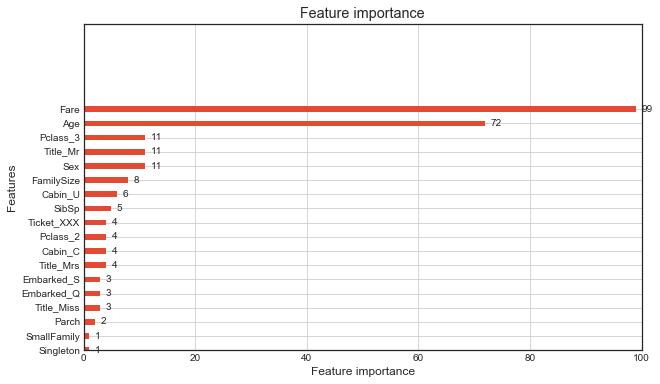

In [212]:
ax = lgb.plot_importance(gbm, height = 0.4, max_num_features=25, xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [213]:
from sklearn.metrics import auc, accuracy_score, roc_auc_score

In [214]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
print('The accuracy of prediction is:', accuracy_score(y_test, y_pred))
print('The roc_auc_score of prediction is:', roc_auc_score(y_test, y_pred))
print('The null acccuracy is:', max(y_test.mean(), 1 - y_test.mean()))

The accuracy of prediction is: 0.815642458101
The roc_auc_score of prediction is: 0.780716950959
The null acccuracy is: 0.6256983240223464


In [215]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[103   9]
 [ 24  43]]


Confusion matrix, without normalization
[[103   9]
 [ 24  43]]
Normalized confusion matrix
[[ 0.92  0.08]
 [ 0.36  0.64]]


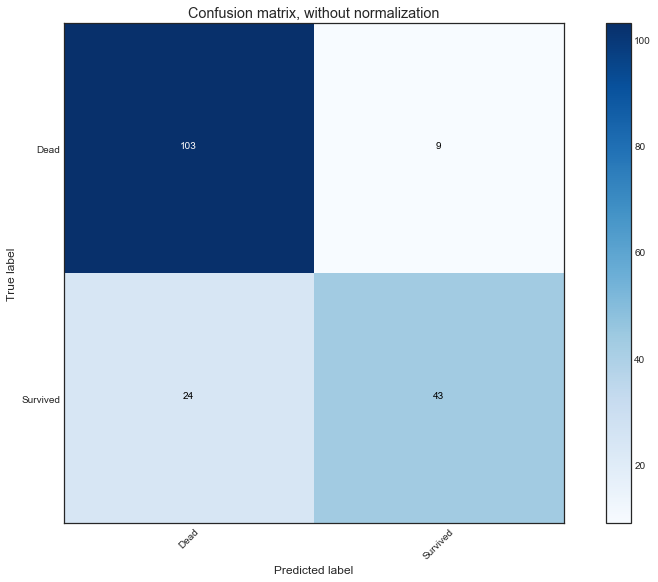

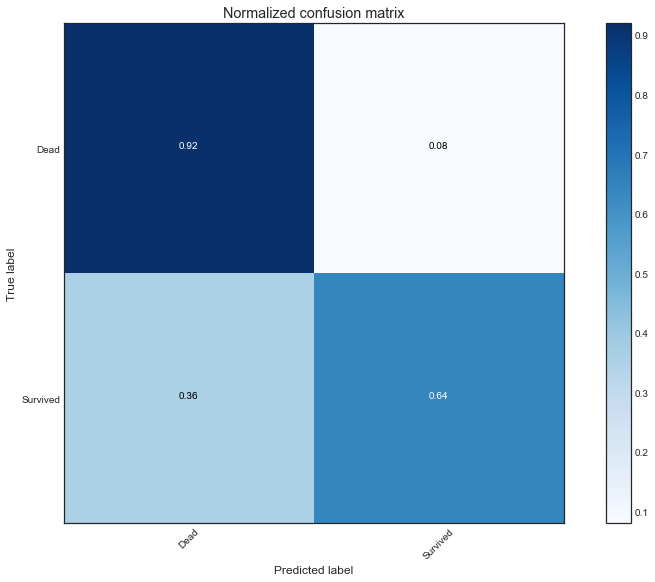

In [216]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

In [217]:
y_pred_prob = gbm.predict_proba(X_test)[:, 1]

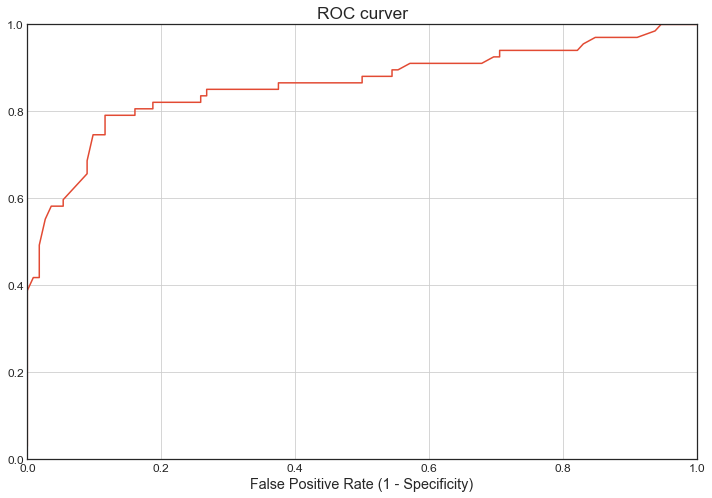

In [219]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curver')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid(True)

In [220]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.861607142857


In [221]:
gbm = lgb.LGBMClassifier(learning_rate = 0.1, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)

gbm.fit(train, targets,
        eval_set=[(train, targets)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	training's auc: 0.909868	training's binary_logloss: 0.642168
Training until validation scores don't improve for 5 rounds.
[2]	training's auc: 0.91734	training's binary_logloss: 0.598653
[3]	training's auc: 0.923385	training's binary_logloss: 0.562308
[4]	training's auc: 0.922778	training's binary_logloss: 0.532133
[5]	training's auc: 0.924509	training's binary_logloss: 0.506689
[6]	training's auc: 0.925295	training's binary_logloss: 0.484446
[7]	training's auc: 0.925489	training's binary_logloss: 0.466283
[8]	training's auc: 0.926584	training's binary_logloss: 0.449092
[9]	training's auc: 0.92615	training's binary_logloss: 0.435373
[10]	training's auc: 0.926158	training's binary_logloss: 0.422755
[11]	training's auc: 0.926858	training's binary_logloss: 0.411733
[12]	training's auc: 0.92734	training's binary_logloss: 0.402236
[13]	training's auc: 0.928514	training's binary_logloss: 0.392909
[14]	training's auc: 0.92881	training's binary_logloss: 0.385085
[15]	training's auc: 0.92969

LGBMClassifier(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.1,
        max_bin=255, max_depth=-1, metric='l1', min_child_samples=10,
        min_child_weight=5, min_split_gain=0.0, n_estimators=20, n_jobs=-1,
        num_leaves=38, objective=None, random_state=0, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=50000, subsample_freq=1)

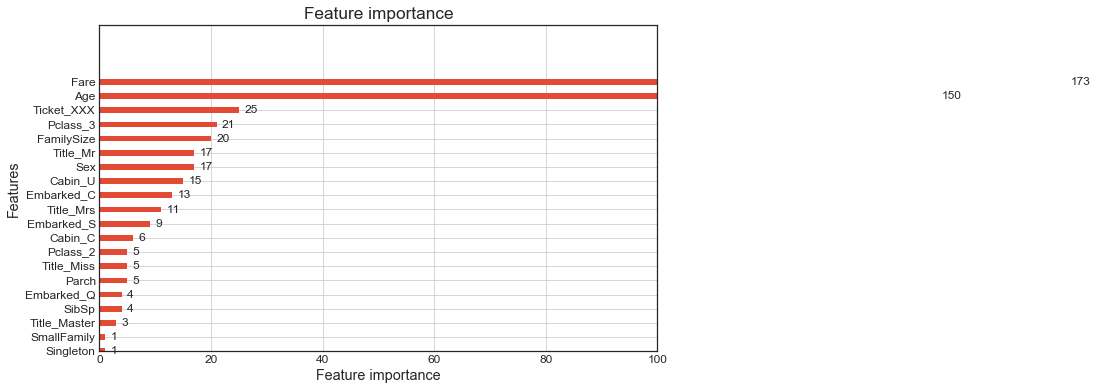

In [222]:
ax = lgb.plot_importance(gbm, height = 0.4, max_num_features=25, xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [223]:
y_pred = gbm.predict(test, num_iteration=gbm.best_iteration_)

In [224]:
df_output = pd.DataFrame()
aux = pd.read_csv('test.csv')
df_output['PassengerId'] = aux['PassengerId']
df_output['Survived'] = y_pred
df_output[['PassengerId','Survived']].to_csv('lightgbm_final.csv',index=False)

Результат: 0.79425

## EDA - Exploratory Data Analysis (Разведочный анализ)

Посмотрим на соотношение выживших и погибших

In [8]:
train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

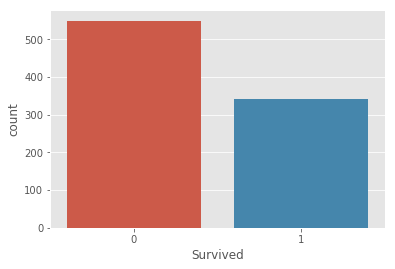

In [9]:
sns.countplot(train['Survived'])

Посмотрим на распределение данных по полу среди выживших и погибших

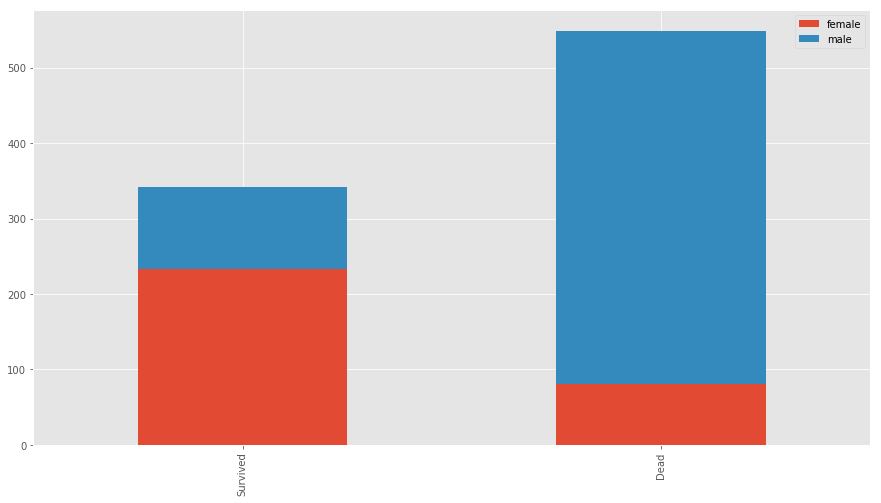

In [10]:
survived_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_sex = train[train['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

Распределение данных по тарифу

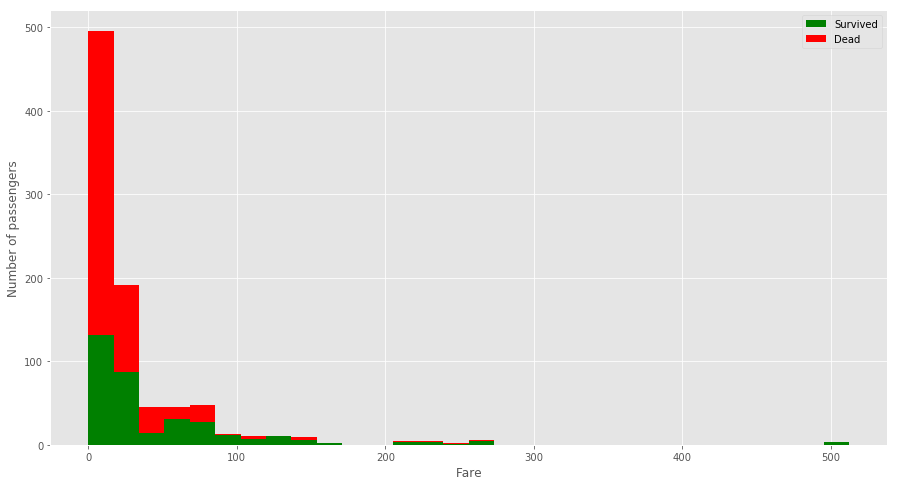

In [11]:
figure = plt.figure(figsize=(15,8))
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

Построим диаграмму рассеивания - Возраст и Тариф

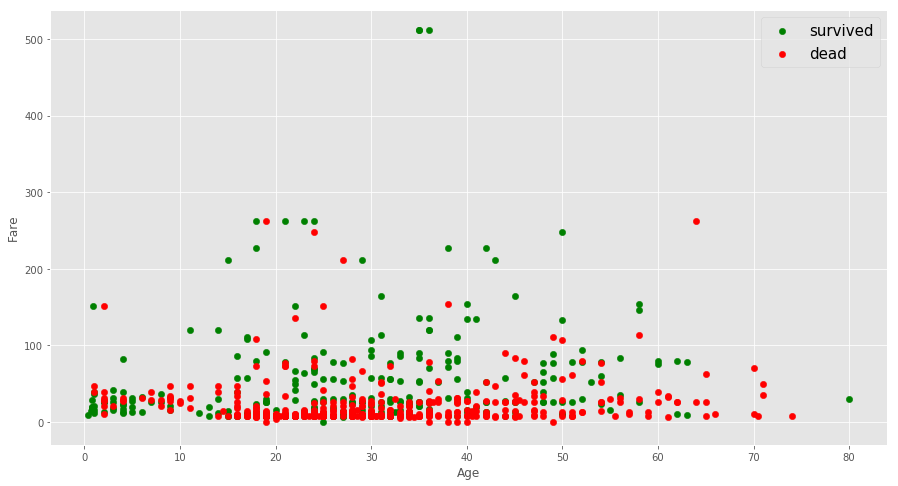

In [12]:
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.scatter(train[train['Survived']==1]['Age'],train[train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(train[train['Survived']==0]['Age'],train[train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

График распределения среднего тарифа к классу каюты

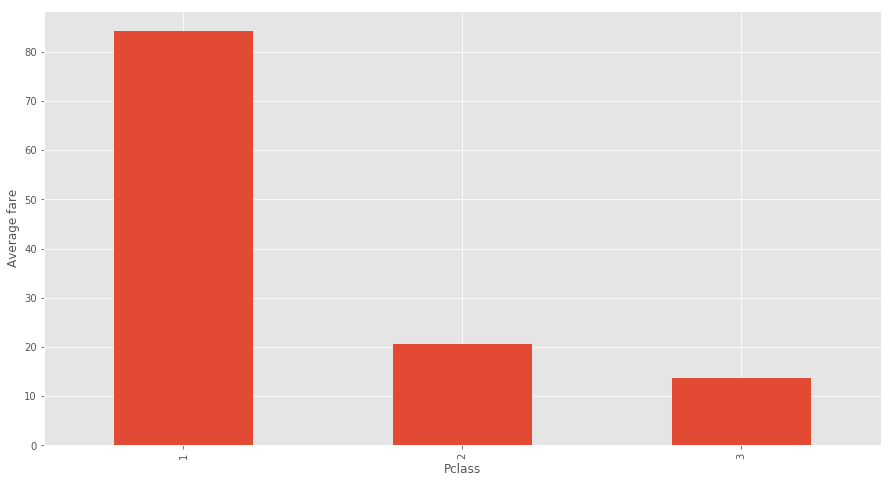

In [13]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
train.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(15,8), ax = ax)

Графики по порту отбытия пассажиров. C = Cherbourg, Q = Queenstown, S = Southampton

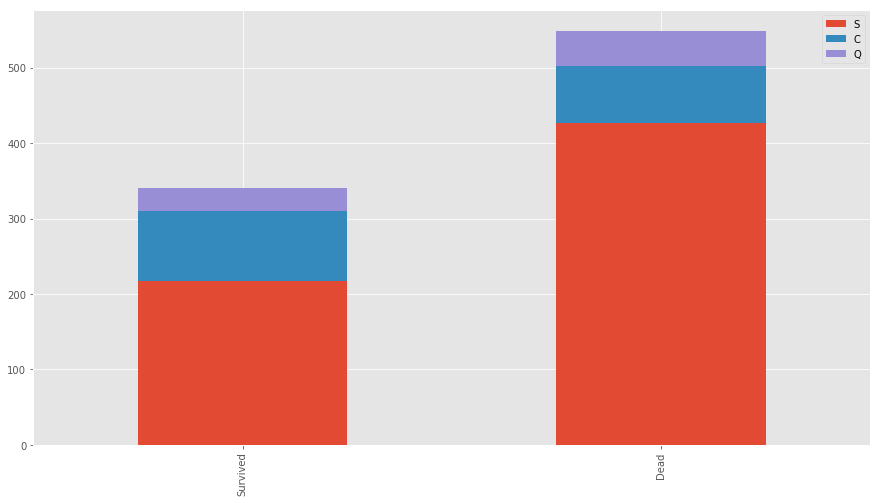

In [15]:
survived_embark = train[train['Survived']==1]['Embarked'].value_counts()
dead_embark = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived_embark,dead_embark])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(15,8))

Построим график распределение данных: Pclass
Предпологаем, что класс влияет на выживание пассажира

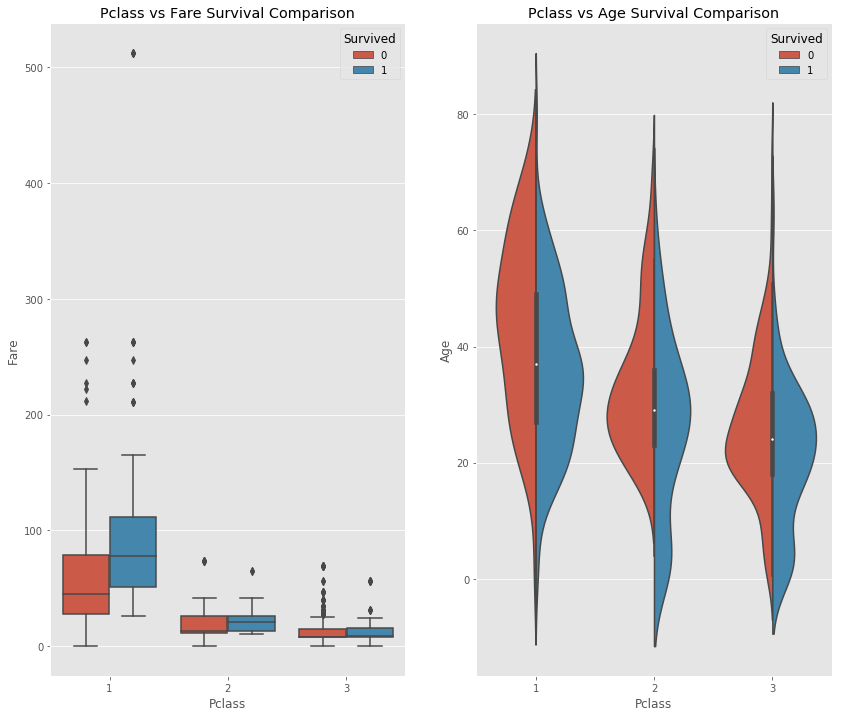

In [21]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = train, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

Как связан  класса с полом и выживанием

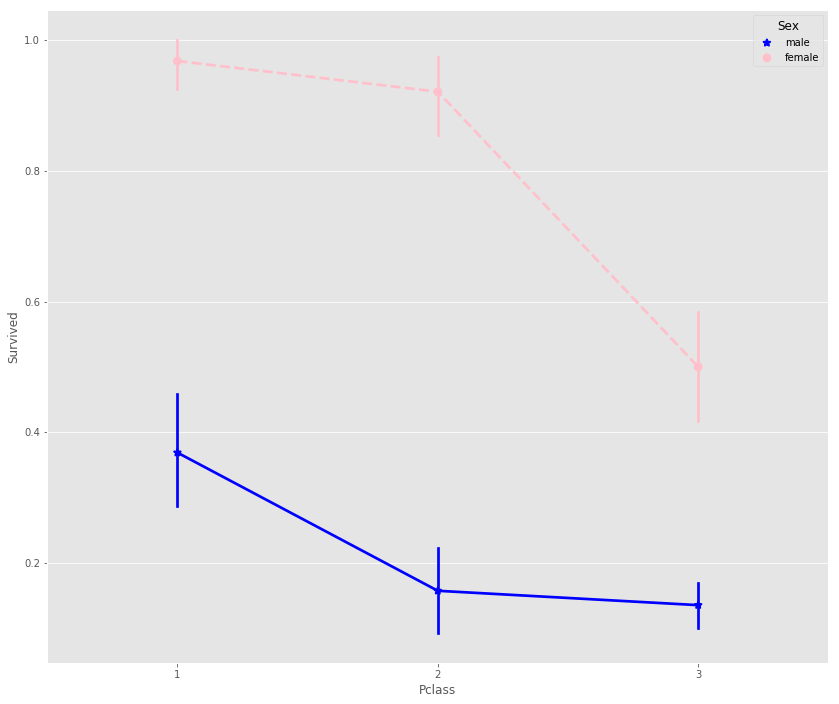

In [26]:
fig, (maxis1) = plt.subplots(1, 1,figsize=(14,12))

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

График распределения возраста пассажиров, которые выжили или не выжили

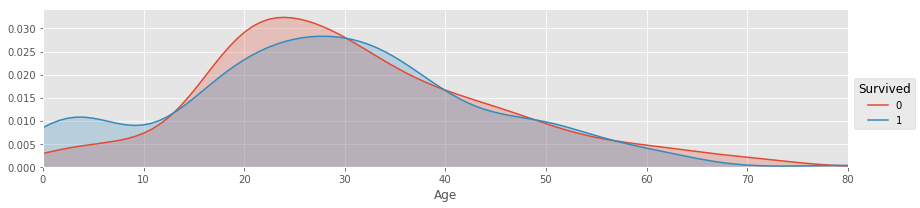

In [28]:
a = sns.FacetGrid( train, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train['Age'].max()))
a.add_legend()

Сравнение гистограмм пола, класса и возраста по выживанию

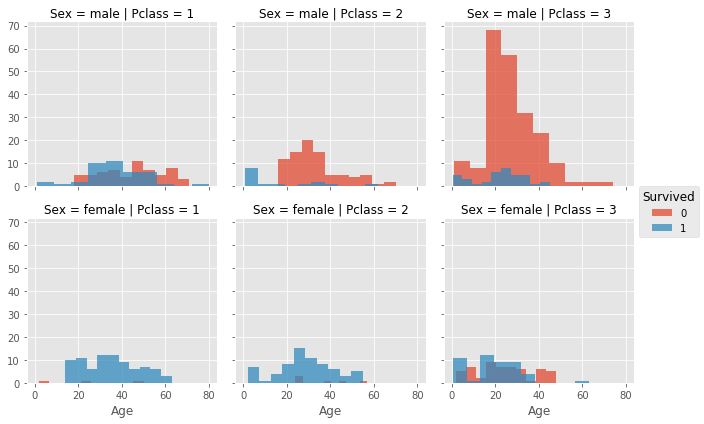

In [31]:
h = sns.FacetGrid(train, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

Парные графики всего набора данных

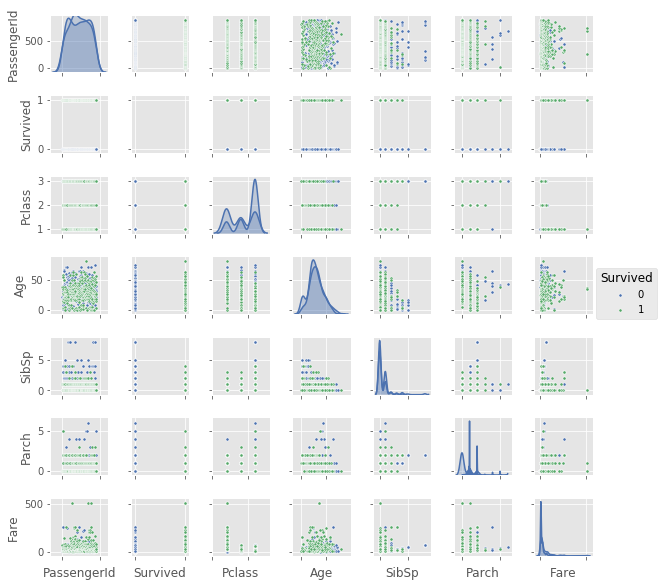

In [32]:
#pair plots of entire dataset
pp = sns.pairplot(train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

Тепловая карта матрицы корреляций

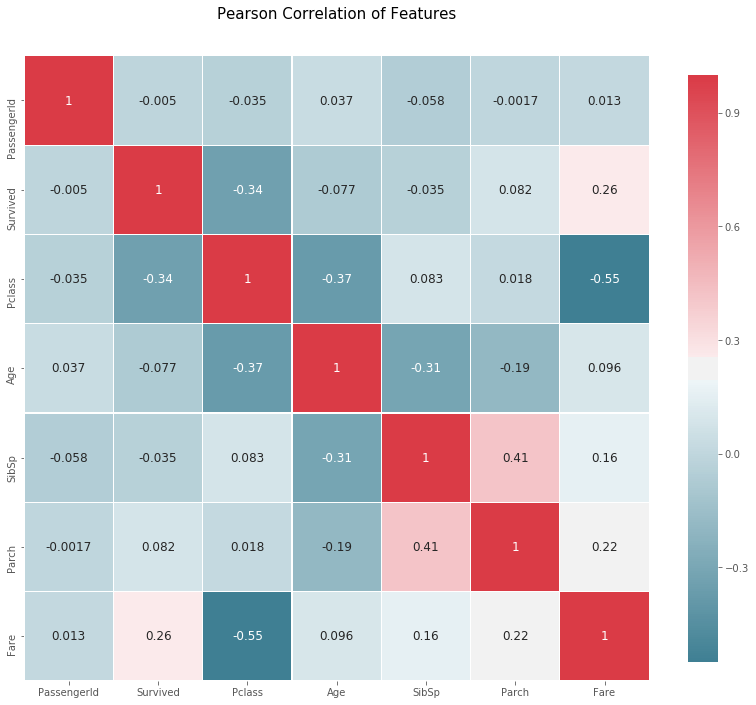

In [34]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

## Очистка и подготовка данных

In [38]:
data_cleaner = [train, test]

Заполняем пустые - медианой, модой

In [39]:
for dataset in data_cleaner:    
    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

drop_column = ['PassengerId','Cabin', 'Ticket']
train.drop(drop_column, axis=1, inplace = True)

print(train.isnull().sum())
print("-"*10)
print(train.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Создадим новые признаки. 

In [40]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0

    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


stat_min = 10 
title_names = (train['Title'].value_counts() < stat_min) 

train['Title'] = train['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(train['Title'].value_counts())
print("-"*10)


train.info()
test.info()
train.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
37,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
128,1,3,"Peter, Miss. Anna",female,28.0,1,1,22.3583,C,3,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
784,0,3,"Ali, Mr. William",male,25.0,0,0,7.0500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
711,0,1,"Klaber, Mr. Herman",male,28.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
420,0,3,"Gheorgheff, Mr. Stanio",male,28.0,0,0,7.8958,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
62,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,83.4750,S,2,0,Mr,"(31.0, 512.329]","(32.0, 48.0]"
568,0,3,"Doharr, Mr. Tannous",male,28.0,0,0,7.2292,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
53,1,2,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",female,29.0,1,0,26.0000,S,2,0,Mrs,"(14.454, 31.0]","(16.0, 32.0]"
75,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


## Преобразование типов данных

Преобразуем объекты в категорию с помощью Label Encoder

In [44]:
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


Target = ['Survived']

train_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
train_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
train_xy =  Target + train_x
print('Original X Y: ', train_xy, '\n')

train_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
train_xy_bin = Target + train_x_bin
print('Bin X Y: ', train_xy_bin, '\n')

train_dummy = pd.get_dummies(train[train_x])
train_x_dummy = train_dummy.columns.tolist()
train_xy_dummy = Target + train_x_dummy
print('Dummy X Y: ', train_xy_dummy, '\n')

train_dummy.head()

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [46]:
print('Train columns with null values: \n', train.isnull().sum())
print("-"*10)
print (train.info())
print("-"*10)

print('Test/Validation columns with null values: \n', test.isnull().sum())
print("-"*10)
print (test.info())
print("-"*10)

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

## Разобъем данные на train и test

In [48]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(train[train_x_calc], train[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(train[train_x_bin], train[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(train_dummy[train_x_dummy], train[Target], random_state = 0)


print("Data1 Shape: {}".format(train.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


## Строим модели

In [50]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = train[Target]

row_index = 0
for alg in MLA:

    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    cv_results = model_selection.cross_validate(alg, train[train_x_bin], train[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    alg.fit(train[train_x_bin], train[Target])
    MLA_predict[MLA_name] = alg.predict(train[train_x_bin])
    
    row_index+=1


MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'colsample_bylevel': 1, 'c...",0.856367,0.829478,0.0527546,0.126455
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0988458
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.823881,0.0492537,0.0333126
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0823555
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822015,0.0529916,0.164045
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.891948,0.822015,0.071335,0.0185264
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.821269,0.0489091,0.00279863
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.890824,0.818657,0.0513463,0.0475564
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.145061
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.812313,0.0667994,0.00209994


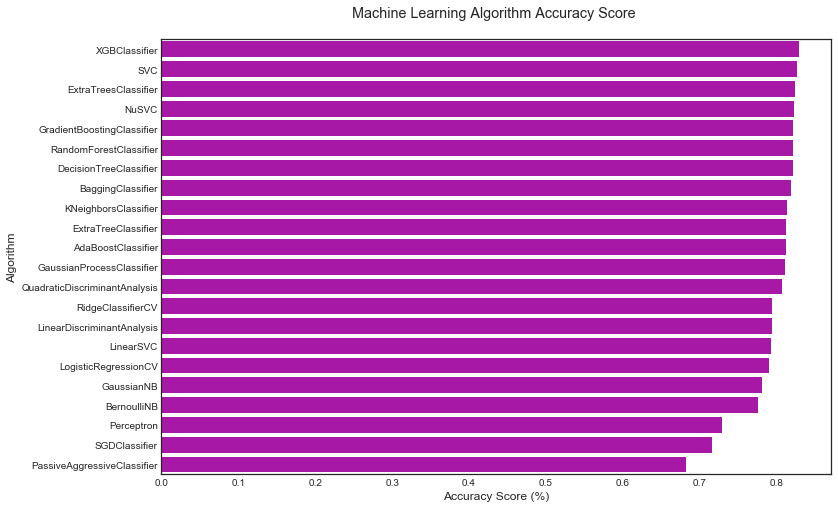

In [51]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## Оценка производительности модели

In [54]:
import random

In [56]:
for index, row in train.iterrows(): 
    if random.random() > .5:        
        train.set_value(index, 'Random_Predict', 1)
    else: 
        train.set_value(index, 'Random_Predict', 0)
    
train['Random_Score'] = 0 
train.loc[(train['Survived'] == train['Random_Predict']), 'Random_Score'] = 1 
print('Coin Flip Model Accuracy: {:.2f}%'.format(train['Random_Score'].mean()*100))

print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(train['Survived'], train['Random_Predict'])*100))

Coin Flip Model Accuracy: 49.27%
Coin Flip Model Accuracy w/SciKit: 49.27%


In [57]:
pivot_female = train[train.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = train[train.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (31.0, 512.329]    1.000000
                S         (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (7.91, 14.454]     1.000000
                S         (7.91, 14.454]     0.875000
                          (14.454, 31.0]     0.916667
                          (31.0, 512.329]    1.000000
        3       C         (-0.001, 7.91]     1.000000
                          (7.91, 14.454]     0.428571
                          (14.454, 31.0]     0.666667
                Q         (-0.001, 7.91]     0.750000
                          (7.91, 14.454]     0.500000


In [62]:
def mytree(df):
    
 
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        Model.loc[index, 'Predict'] = 0

        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


Tree_Predict = mytree(train)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(train['Survived'], Tree_Predict)*100))

Decision Tree Model Accuracy/Precision Score: 82.04%



Визуализация confusion matrix

Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[ 0.91  0.09]
 [ 0.32  0.68]]


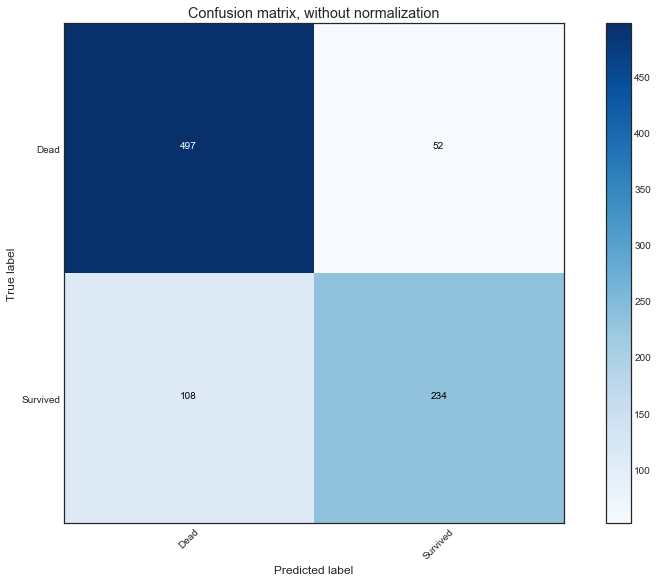

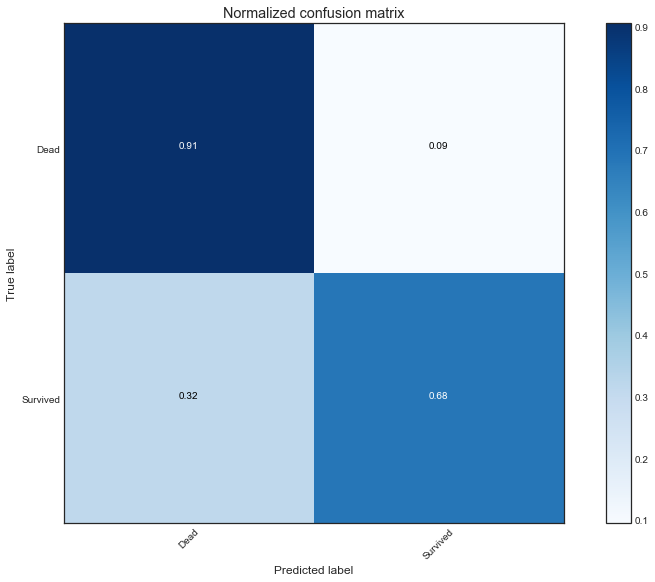

In [63]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = metrics.confusion_matrix(train['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

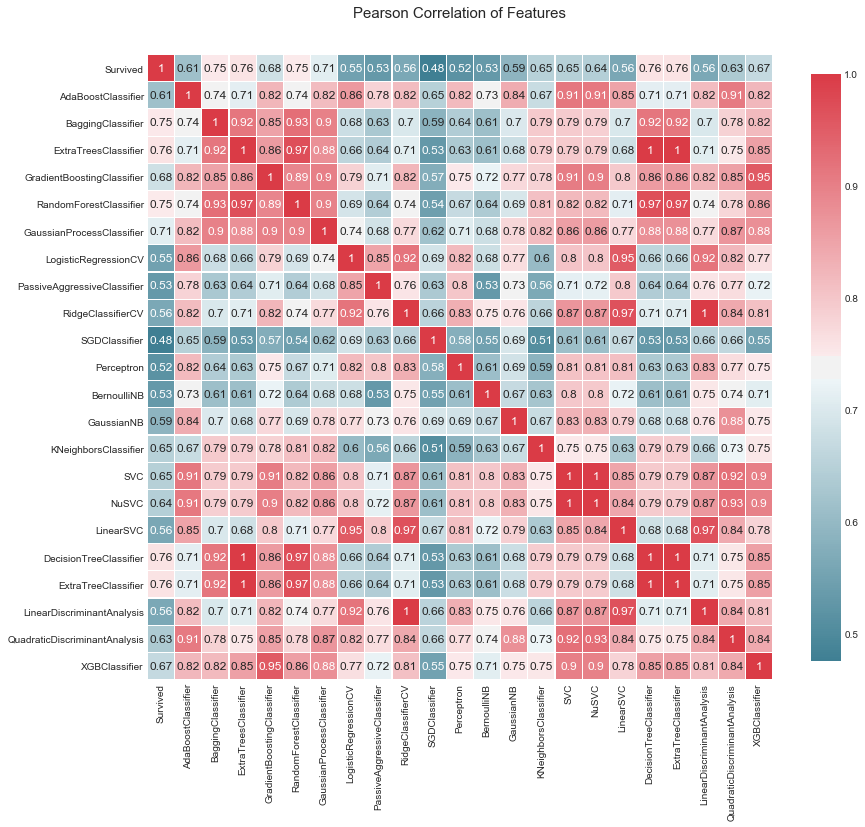

In [72]:
correlation_heatmap(MLA_predict)

In [74]:
vote_est = [
    #Ensemble Methods: http://scikit-learn.org/stable/modules/ensemble.html
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Gaussian Processes: http://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #GLM: http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Navies Bayes: http://scikit-learn.org/stable/modules/naive_bayes.html
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Nearest Neighbor: http://scikit-learn.org/stable/modules/neighbors.html
    ('knn', neighbors.KNeighborsClassifier()),
    
    #SVM: http://scikit-learn.org/stable/modules/svm.html
    ('svc', svm.SVC(probability=True)),
    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
   ('xgb', XGBClassifier())

]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, train[train_x_bin], train[Target], cv  = cv_split)
vote_hard.fit(train[train_x_bin], train[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, train[train_x_bin], train[Target], cv  = cv_split)
vote_soft.fit(train[train_x_bin], train[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Hard Voting Training w/bin score mean: 86.57
Hard Voting Test w/bin score mean: 82.24
Hard Voting Test w/bin score 3*std: +/- 4.48
----------
Soft Voting Training w/bin score mean: 87.25
Soft Voting Test w/bin score mean: 82.20
Soft Voting Test w/bin score 3*std: +/- 3.78
----------
